<a href="https://colab.research.google.com/github/joshkraft/joshkraft-blog/blob/master/_notebooks/2020-29-11-Poodles-and-Doodles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Poodles and Doodles: An Introduction to Bias in Machine Learning Algorithms"
> "An applied introduction to the causes of algorithmic bias, as well as a path towards resolving this issue."

- toc: false
- permalink: /bias/
- branch: master
- badges: true
- comments: true
- hide: true
- search_exclude: true

# Introduction
In a [2019 panel at the Schwarzman College of Computing](https://www.youtube.com/watch?v=Sm7I4QjscVQ&feature=share), Joi Ito (then director of the [MIT Media Lab](https://www.media.mit.edu/) gave an interesting perspective on the applications of AI in the real world:

> I think of AI as sort of jetpacks and blindfolds, that are going to come in and send us careening in whatever direction we're already headed in.
>
> It's going to make us more powerful, but not necessarily more wise. And I think that the key thing is to get our house in order before the jetpacks come on.
>
> ...
>
> Even though we talk about explainability, a lot of the explainability has been explainability between technical people.
>
> It's not explainability to courts.
>
> It's not explainability to political systems.

I agree with Ito. However, I think the jetpacks and blindfolds are already here. Machine learning models are already making many of the highest impact decisions in society:

[Who is able to get a loan to start a small business?](https://hbr.org/2020/11/ai-can-make-bank-loans-more-fair?ab=hero-main-text)

[Who is able to get a job interview?](https://arxiv.org/abs/1906.09208)

[Who gets sent to jail?](https://www.technologyreview.com/2019/10/17/75285/ai-fairer-than-judge-criminal-risk-assessment-algorithm/)


Many people have read headlines warning of algorithmic bias. However, understanding this issue at a deeper level is often difficult for those without a technical background in machine learning. In this post, I will walk through some of the important concepts relating to algorithmic bias by building, refining, and criticizing a machine learning model.

## Algorithmic Bias, Defined
First, a definition:
> Algorithmic bias describes systematic and repeatable errors in a computer system that create unfair outcomes, such as privileging one arbitrary group of users over others. Bias can emerge due to many factors, including but not limited to the design of the algorithm or the unintended or unanticipated use or decisions relating to the way data is coded, collected, selected or used to train the algorithm. 

## How/Why It Happens

## A Proposed Pipeline (Tools)

## An Example: Poodles and Doodles

## Further Resources



# Resources

Zack Lipton

- [Podcast](https://open.spotify.com/episode/0op4SAaHjSELe1Cg2q3cvs?si=BMolHW-7Toag8gkac2fbHg) (39:25) 
- [Paper](http://zacklipton.com/media/papers/fairness-non-ideal-fazelpour-lipton-2020.pdf)

Computing for the People: Ethics and AI

- [Video](https://www.youtube.com/watch?v=Sm7I4QjscVQ&feature=share)

Brookings Institue AI and Bias Series

- [Post]

# An Example: Poodles vs. Doodles

To make all of this concrete, I will know walk through an actual example, by training, analyzing, critiquing, and improving a machine learning algorithm to detect whether a dog in a photograph is a poodle or a doodle. 

> Note: I will be excluding some of the code used in this analysis for brevity. Feel free to check out the entire notebook using the badges at the top of this page.

In [12]:
%%capture
#hide
!pip install fastai --upgrade

import fastai
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy 

from google.colab import drive
import glob
import PIL
import ipywidgets as widgets
drive.mount('/content/drive')

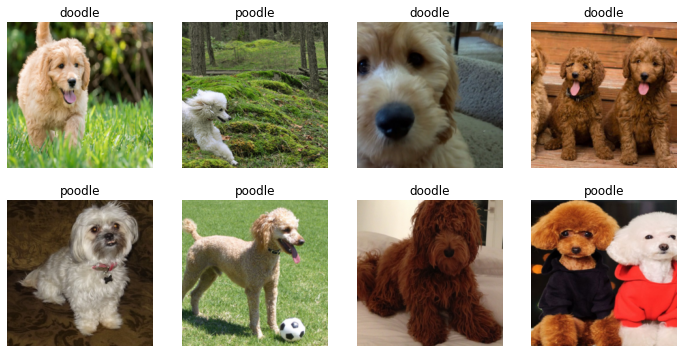

In [13]:
path = Path("/content/drive/My Drive/Datasets/poodles-and-doodles/data/")

def remove_corrupt_images(path):
  file_names = get_image_files(path)
  failed = verify_images(file_names)
  failed.map(Path.unlink);

remove_corrupt_images(path)

dogs = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5))

dls = dogs.dataloaders(path)

dls.train.show_batch(max_n=8, nrows=2)